In [2]:
#import packages
import datetime as dt
import numpy as np
import matplotlib 
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import xarray as xr
import scipy.stats
import pickle

In [3]:
#open files for split gph data and recombine, old root is ../2023ClusterCode/Pickles/

infile = open("../../New_ERAfiles/N20_gph_NEW.p", 'rb')
gph = pickle.load(infile)
infile.close()

infile = open("../../New_ERAfiles/N20_gph_time_NEW.p", 'rb')
gph_time = pickle.load(infile)
infile.close()

infile = open("../../New_ERAfiles/N20_gph_lat_NEW.p", 'rb')
gph_lat = pickle.load(infile)
infile.close()

infile = open("../../New_ERAfiles/N20_gph_lon_NEW.p", 'rb')
gph_lon = pickle.load(infile)
infile.close()

In [4]:
infile = open("N20_UW_lat.p", 'rb')
unweighted_lat = pickle.load(infile)
infile.close()

infile = open("N20_UW_lon.p", 'rb') 
unweighted_lon = pickle.load(infile)
infile.close()

infile = open("N20_ANOMcluster_labels.p", 'rb') 
label = pickle.load(infile)
infile.close()

infile = open("N20_HOURLY_ANOMcluster_labels.p", 'rb') 
label_H = pickle.load(infile)
infile.close()

In [5]:
#old root is ../../Ellipse_ERAI_data/
infile = open("../../New_EllipseVals/ephi10_NEW.p", 'rb')
ephi10 = pickle.load(infile)
infile.close()

infile = open("../../New_EllipseVals/ephi_ratio10_NEW.p", 'rb')
rat10 = pickle.load(infile)
infile.close()

infile = open("../../New_EllipseVals/ephi_size10_NEW.p", 'rb')
size10 = pickle.load(infile)
infile.close()

infile = open("../../New_EllipseVals/ephi_cenlat10_NEW.p", 'rb')
cenlat10 = pickle.load(infile)
infile.close()

infile = open("../../New_EllipseVals/ephi_cenlon10_NEW.p", 'rb')
cenlon10 = pickle.load(infile)
infile.close()

infile = open("../../New_EllipseVals/ephi_wind10_NEW.p", 'rb')
wind10 = pickle.load(infile)
infile.close()

In [6]:
rat10.shape

(20, 608)

In [7]:
wind = np.reshape(wind10, (12160))
ephi = np.reshape(ephi10, (12160))
rat = np.reshape(rat10, (12160))
size = np.reshape(size10, (12160))
cenlt= np.reshape(cenlat10, (12160))
cenln= np.reshape(cenlon10, (12160))

Create datasets.

In [8]:
#non-stacked
gph = xr.DataArray(data= gph, 
                       dims = ["time","lat","lon"],
                       coords = dict(
                           time = gph_time,
                           lat = gph_lat,
                           lon = gph_lon)
                      )
gph_D = gph.groupby('time.date').mean()

gph

<xarray.DataArray (time: 12160, lat: 99, lon: 512)>
array([[[31054.1  , 31054.812, 31054.61 , ..., 31048.95 , 31050.836,
         31052.672],
        [31055.426, 31056.547, 31056.904, ..., 31050.02 , 31051.855,
         31053.691],
        [31055.018, 31056.342, 31057.158, ..., 31049.816, 31051.447,
         31053.232],
        ...,
        [29367.795, 29367.387, 29366.928, ..., 29369.018, 29368.611,
         29368.203],
        [29356.883, 29356.578, 29356.322, ..., 29357.648, 29357.393,
         29357.139],
        [29347.91 , 29347.809, 29347.654, ..., 29348.268, 29348.113,
         29348.012]],

       [[31003.533, 31002.107, 31001.291, ..., 31008.582, 31007.002,
         31005.268],
        [31006.797, 31005.318, 31004.146, ..., 31011.387, 31010.01 ,
         31008.43 ],
        [31009.193, 31007.715, 31006.44 , ..., 31013.068, 31011.896,
         31010.52 ],
...
        [29473.12 , 29473.68 , 29474.24 , ..., 29471.588, 29472.098,
         29472.61 ],
        [29501.16 , 29501.467, 29501.824, ..., 29500.191, 29500.498,
         29500.803],
        [29530.63 , 29530.783, 29530.936, ..., 29530.223, 29530.324,
         29530.477]],

       [[30916.316, 30916.928, 30918.049, ..., 30914.633, 30915.348,
         30915.756],
        [30913.818, 30914.582, 30915.55 , ..., 30911.88 , 30912.543,
         30913.053],
        [30911.625, 30912.29 , 30913.104, ..., 30909.738, 30910.352,
         30910.861],
        ...,
        [29456.133, 29456.643, 29457.154, ..., 29454.654, 29455.113,
         29455.623],
        [29484.482, 29484.787, 29485.094, ..., 29483.564, 29483.87 ,
         29484.176],
        [29514.46 , 29514.562, 29514.717, ..., 29514.053, 29514.156,
         29514.309]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1999-11-01 ... 2019-04-01T18:00:00
  * lat      (lat) float32 0.9354 0.931 0.9265 ... 0.03373 0.02152 0.009375
  * lon      (lon) float32 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3

In [9]:
wind = xr.DataArray(data= wind,dims = ["time"], coords = dict(time = gph_time))
wind_H = np.nan_to_num(wind.values, nan = -999)

wind_D = wind.groupby('time.date').mean()
wind_D2 = np.nan_to_num(wind_D, nan = -999)
########
ephi = xr.DataArray(data= ephi,dims = ["time"], coords = dict(time = gph_time))
ephi_H = np.nan_to_num(ephi.values, nan = -999)

ephi_D = ephi.groupby('time.date').mean()
ephi_D2 = np.nan_to_num(ephi_D, nan = -999)
########
rat = xr.DataArray(data= rat,dims = ["time"], coords = dict(time = gph_time))
rat_H = np.nan_to_num(rat.values, nan = -999)

rat_D = rat.groupby('time.date').mean()
rat_D2 = np.nan_to_num(rat_D, nan = -999)
########
size = xr.DataArray(data= size,dims = ["time"], coords = dict(time = gph_time))
size_H = np.nan_to_num(size.values, nan = -999)

size_D = size.groupby('time.date').mean()
size_D2 = np.nan_to_num(size_D, nan = -999)
########
cenlt = xr.DataArray(data= cenlt,dims = ["time"], coords = dict(time = gph_time))
cenlt_H = np.nan_to_num(cenlt.values, nan = -999)

cenlt_D = cenlt.groupby('time.date').mean()
cenlt_D2 = np.nan_to_num(cenlt_D, nan = -999)
########
cenln = xr.DataArray(data= cenln,dims = ["time"], coords = dict(time = gph_time))
cenln_H = np.nan_to_num(cenln.values, nan = -999)

cenln_D = cenln.groupby('time.date').mean()
cenln_D2 = np.nan_to_num(cenln_D, nan = -999)

In [11]:
ephi_D2.shape

(3040,)

For now just looking at DOY, metrics based on clusters of GPH. 

In [9]:
label_D = label.reshape(20,152)

#label_H = label_H.reshape(20,608)

In [10]:
gph_D_array = gph_D["date"].to_numpy()
cluster_dates = gph_D_array.reshape(20,152)

In [11]:
cluster_dates 

array([[datetime.date(1999, 11, 1), datetime.date(1999, 11, 2),
        datetime.date(1999, 11, 3), ..., datetime.date(2000, 3, 29),
        datetime.date(2000, 3, 30), datetime.date(2000, 3, 31)],
       [datetime.date(2000, 11, 1), datetime.date(2000, 11, 2),
        datetime.date(2000, 11, 3), ..., datetime.date(2001, 3, 30),
        datetime.date(2001, 3, 31), datetime.date(2001, 4, 1)],
       [datetime.date(2001, 11, 1), datetime.date(2001, 11, 2),
        datetime.date(2001, 11, 3), ..., datetime.date(2002, 3, 30),
        datetime.date(2002, 3, 31), datetime.date(2002, 4, 1)],
       ...,
       [datetime.date(2016, 11, 1), datetime.date(2016, 11, 2),
        datetime.date(2016, 11, 3), ..., datetime.date(2017, 3, 30),
        datetime.date(2017, 3, 31), datetime.date(2017, 4, 1)],
       [datetime.date(2017, 11, 1), datetime.date(2017, 11, 2),
        datetime.date(2017, 11, 3), ..., datetime.date(2018, 3, 30),
        datetime.date(2018, 3, 31), datetime.date(2018, 4, 1)],
  

In [12]:
days = []
years = []

for i in range(len(cluster_dates[0,:])):
    test = cluster_dates[0,i]
    test = test.strftime("%m-%d")
    days.append(test)

for i in range(len(cluster_dates[:,0])):
    test = cluster_dates[i,0]
    test = test.strftime("%Y")
    years.append(test)

In [13]:
cluster_dates = xr.DataArray(data= label_D, 
                       dims = ["year","day"],
                       coords = dict(
                           year = years,
                           day = days)
                      )
cluster_dates

<xarray.DataArray (year: 20, day: 152)>
array([[2, 0, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 3, 3, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 4, 2, 2],
       [2, 2, 2, ..., 3, 3, 3]], dtype=int32)
Coordinates:
  * year     (year) <U4 '1999' '2000' '2001' '2002' ... '2016' '2017' '2018'
  * day      (day) <U5 '11-01' '11-02' '11-03' ... '03-29' '03-30' '03-31'

/tmp/ipykernel_5265/3178081192.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(cluster_dates['day'].values,


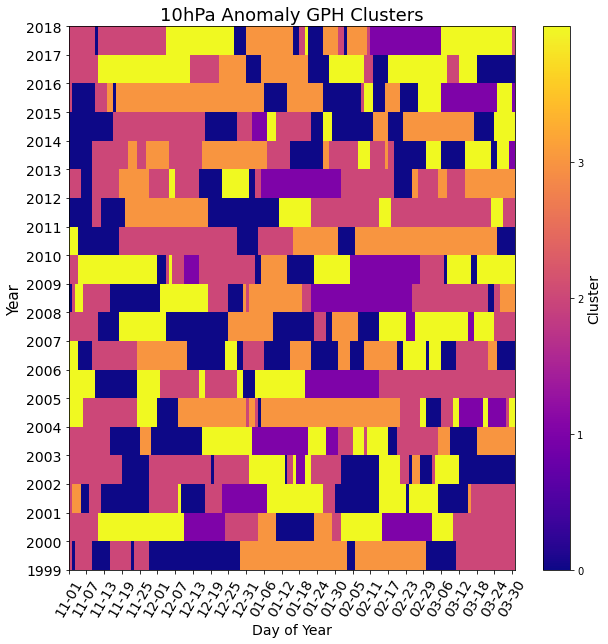

In [14]:
%matplotlib inline
myLocator = mticker.MultipleLocator(6)
fig, ax = plt.subplots(1, 1, figsize=(10, 10)) 
# define the bins and normalize
plt.title("10hPa Anomaly GPH Clusters",fontsize=18)
cmap = matplotlib.cm.plasma
norm = matplotlib.colors.Normalize(vmin = np.min(cluster_dates.values),
                                   vmax=np.max(cluster_dates.values))

cax = ax.pcolormesh(cluster_dates['day'].values,
              cluster_dates['year'].values, 
              cluster_dates.values,cmap=cmap, norm=norm)

ax.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=60,fontsize = 14)
plt.xlabel("Day of Year",fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel("Year",fontsize = 15)

cbar = fig.colorbar(cax, ticks=[3,2,1,0])
cbar.ax.set_yticklabels(['3', '2', '1','0']) 
cbar.set_label(label='Cluster', size=14)

cbar.update_ticks()

#plt.savefig("../2023ClusterCode/Images/EMetClusters/Rat_TimeGrid.png")


In [21]:
#set empty list of metrics across clusters
w1 = []
e1 = []
r1 = []
s1 = []
ct1 = []
cn1 = []

w2 = []
e2 = []
r2 = []
s2 = []
ct2 = []
cn2 = []

w3 = []
e3 = []
r3 = []
s3 = []
ct3 = []
cn3 = []

w4 = []
e4 = []
r4 = []
s4 = []
ct4 = []
cn4 = []

w5 = []
e5 = []
r5 = []
s5 = []
ct5 = []
cn5 = []

In [22]:
#set the initial index for each empty array to 0 so it can increas with each aded value
#loop, create clustered arrays, yay
for k in range(len(label)):
    if label[k] == 0:
        w1.append(wind_D2[k])
        e1.append(ephi_D2[k])
        s1.append(size_D2[k])
        r1.append(rat_D2[k])
        ct1.append(cenlt_D2[k])
        cn1.append(cenln_D2[k])
        
    if label[k] == 1:
        w2.append(wind_D2[k])
        e2.append(ephi_D2[k])
        s2.append(size_D2[k])
        r2.append(rat_D2[k])
        ct2.append(cenlt_D2[k])
        cn2.append(cenln_D2[k])
        
    if label[k] == 2:
        w3.append(wind_D2[k])
        e3.append(ephi_D2[k])
        s3.append(size_D2[k])
        r3.append(rat_D2[k])
        ct3.append(cenlt_D2[k])
        cn3.append(cenln_D2[k])
        
    if label[k] == 3:
        w4.append(wind_D2[k])
        e4.append(ephi_D2[k])
        s4.append(size_D2[k])
        r4.append(rat_D2[k])
        ct4.append(cenlt_D2[k])
        cn4.append(cenln_D2[k])
 
    if label[k] == 4:
        w5.append(wind_D2[k])
        e5.append(ephi_D2[k])
        s5.append(size_D2[k])
        r5.append(rat_D2[k])
        ct5.append(cenlt_D2[k])
        cn5.append(cenln_D2[k])

In [16]:
#set the initial index for each empty array to 0 so it can increas with each aded value
#loop, create clustered arrays, yay
for k in range(len(label_H)):
    if label_H[k] == 0:
        w1.append(wind_H[k])
        e1.append(ephi_H[k])
        s1.append(size_H[k])
        r1.append(rat_H[k])
        ct1.append(cenlt_H[k])
        cn1.append(cenln_H[k])
        
    if label_H[k] == 1:
        w2.append(wind_H[k])
        e2.append(ephi_H[k])
        s2.append(size_H[k])
        r2.append(rat_H[k])
        ct2.append(cenlt_H[k])
        cn2.append(cenln_H[k])
        
    if label_H[k] == 2:
        w3.append(wind_H[k])
        e3.append(ephi_H[k])
        s3.append(size_H[k])
        r3.append(rat_H[k])
        ct3.append(cenlt_H[k])
        cn3.append(cenln_H[k])
        
    if label_H[k] == 3:
        w4.append(wind_H[k])
        e4.append(ephi_H[k])
        s4.append(size_H[k])
        r4.append(rat_H[k])
        ct4.append(cenlt_H[k])
        cn4.append(cenln_H[k])
 
    if label_H[k] == 4:
        w5.append(wind_H[k])
        e5.append(ephi_H[k])
        s5.append(size_H[k])
        r5.append(rat_H[k])
        ct5.append(cenlt_H[k])
        cn5.append(cenln_H[k])

In [23]:
#filter out to ignore NaNs.
##Wind
w1 = [i for i in w1 if i > -50]
w2 = [i for i in w2 if i > -50]
w3 = [i for i in w3 if i > -50]
w4 = [i for i in w4 if i > -50]
w5 = [i for i in w5 if i > -50]

##Ephi
e1 = [i for i in e1 if i > -200]
e2 = [i for i in e2 if i > -200]
e3 = [i for i in e3 if i > -200]
e4 = [i for i in e4 if i > -200]
e5 = [i for i in e5 if i > -200]

##Size
s1 = [i for i in s1 if i > -50]
s2 = [i for i in s2 if i > -50]
s3 = [i for i in s3 if i > -50]
s4 = [i for i in s4 if i > -50]
s5 = [i for i in s5 if i > -50]

##Ratio
r1 = [i for i in r1 if i > -50]
r2 = [i for i in r2 if i > -50]
r3 = [i for i in r3 if i > -50]
r4 = [i for i in r4 if i > -50]
r5 = [i for i in r5 if i > -50]

##Center Latitude
ct1 = [i for i in ct1 if i > -50]
ct2 = [i for i in ct2 if i > -50]
ct3 = [i for i in ct3 if i > -50]
ct4 = [i for i in ct4 if i > -50]
ct5 = [i for i in ct5 if i > -50]

##Center Longitude
cn1 = [i for i in cn1 if i > -360]
cn2 = [i for i in cn2 if i > -360]
cn3 = [i for i in cn3 if i > -360]
cn4 = [i for i in cn4 if i > -360]
cn5 = [i for i in cn5 if i > -360]

In [24]:
#lists of combined cluster data from different metrics

wind_clus = [w1,w2,w3,w4,w5]
ephi_clus = [e1,e2,e3,e4,e5]
rat_clus = [r1,r2,r3,r4,r5]
size_clus = [s1,s2,s3,s4,s5]
cenlat_clus = [ct1,ct2,ct3,ct4,ct5]
cenlon_clus = [cn1,cn2,cn3,cn4,cn5]

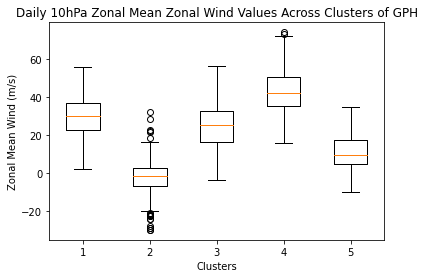

In [25]:
# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.set_title("Daily 10hPa Zonal Mean Zonal Wind Values Across Clusters of GPH")
ax.boxplot(wind_clus)
ax.set_xlabel("Clusters")
ax.set_ylabel("Zonal Mean Wind (m/s)")
plt.show()

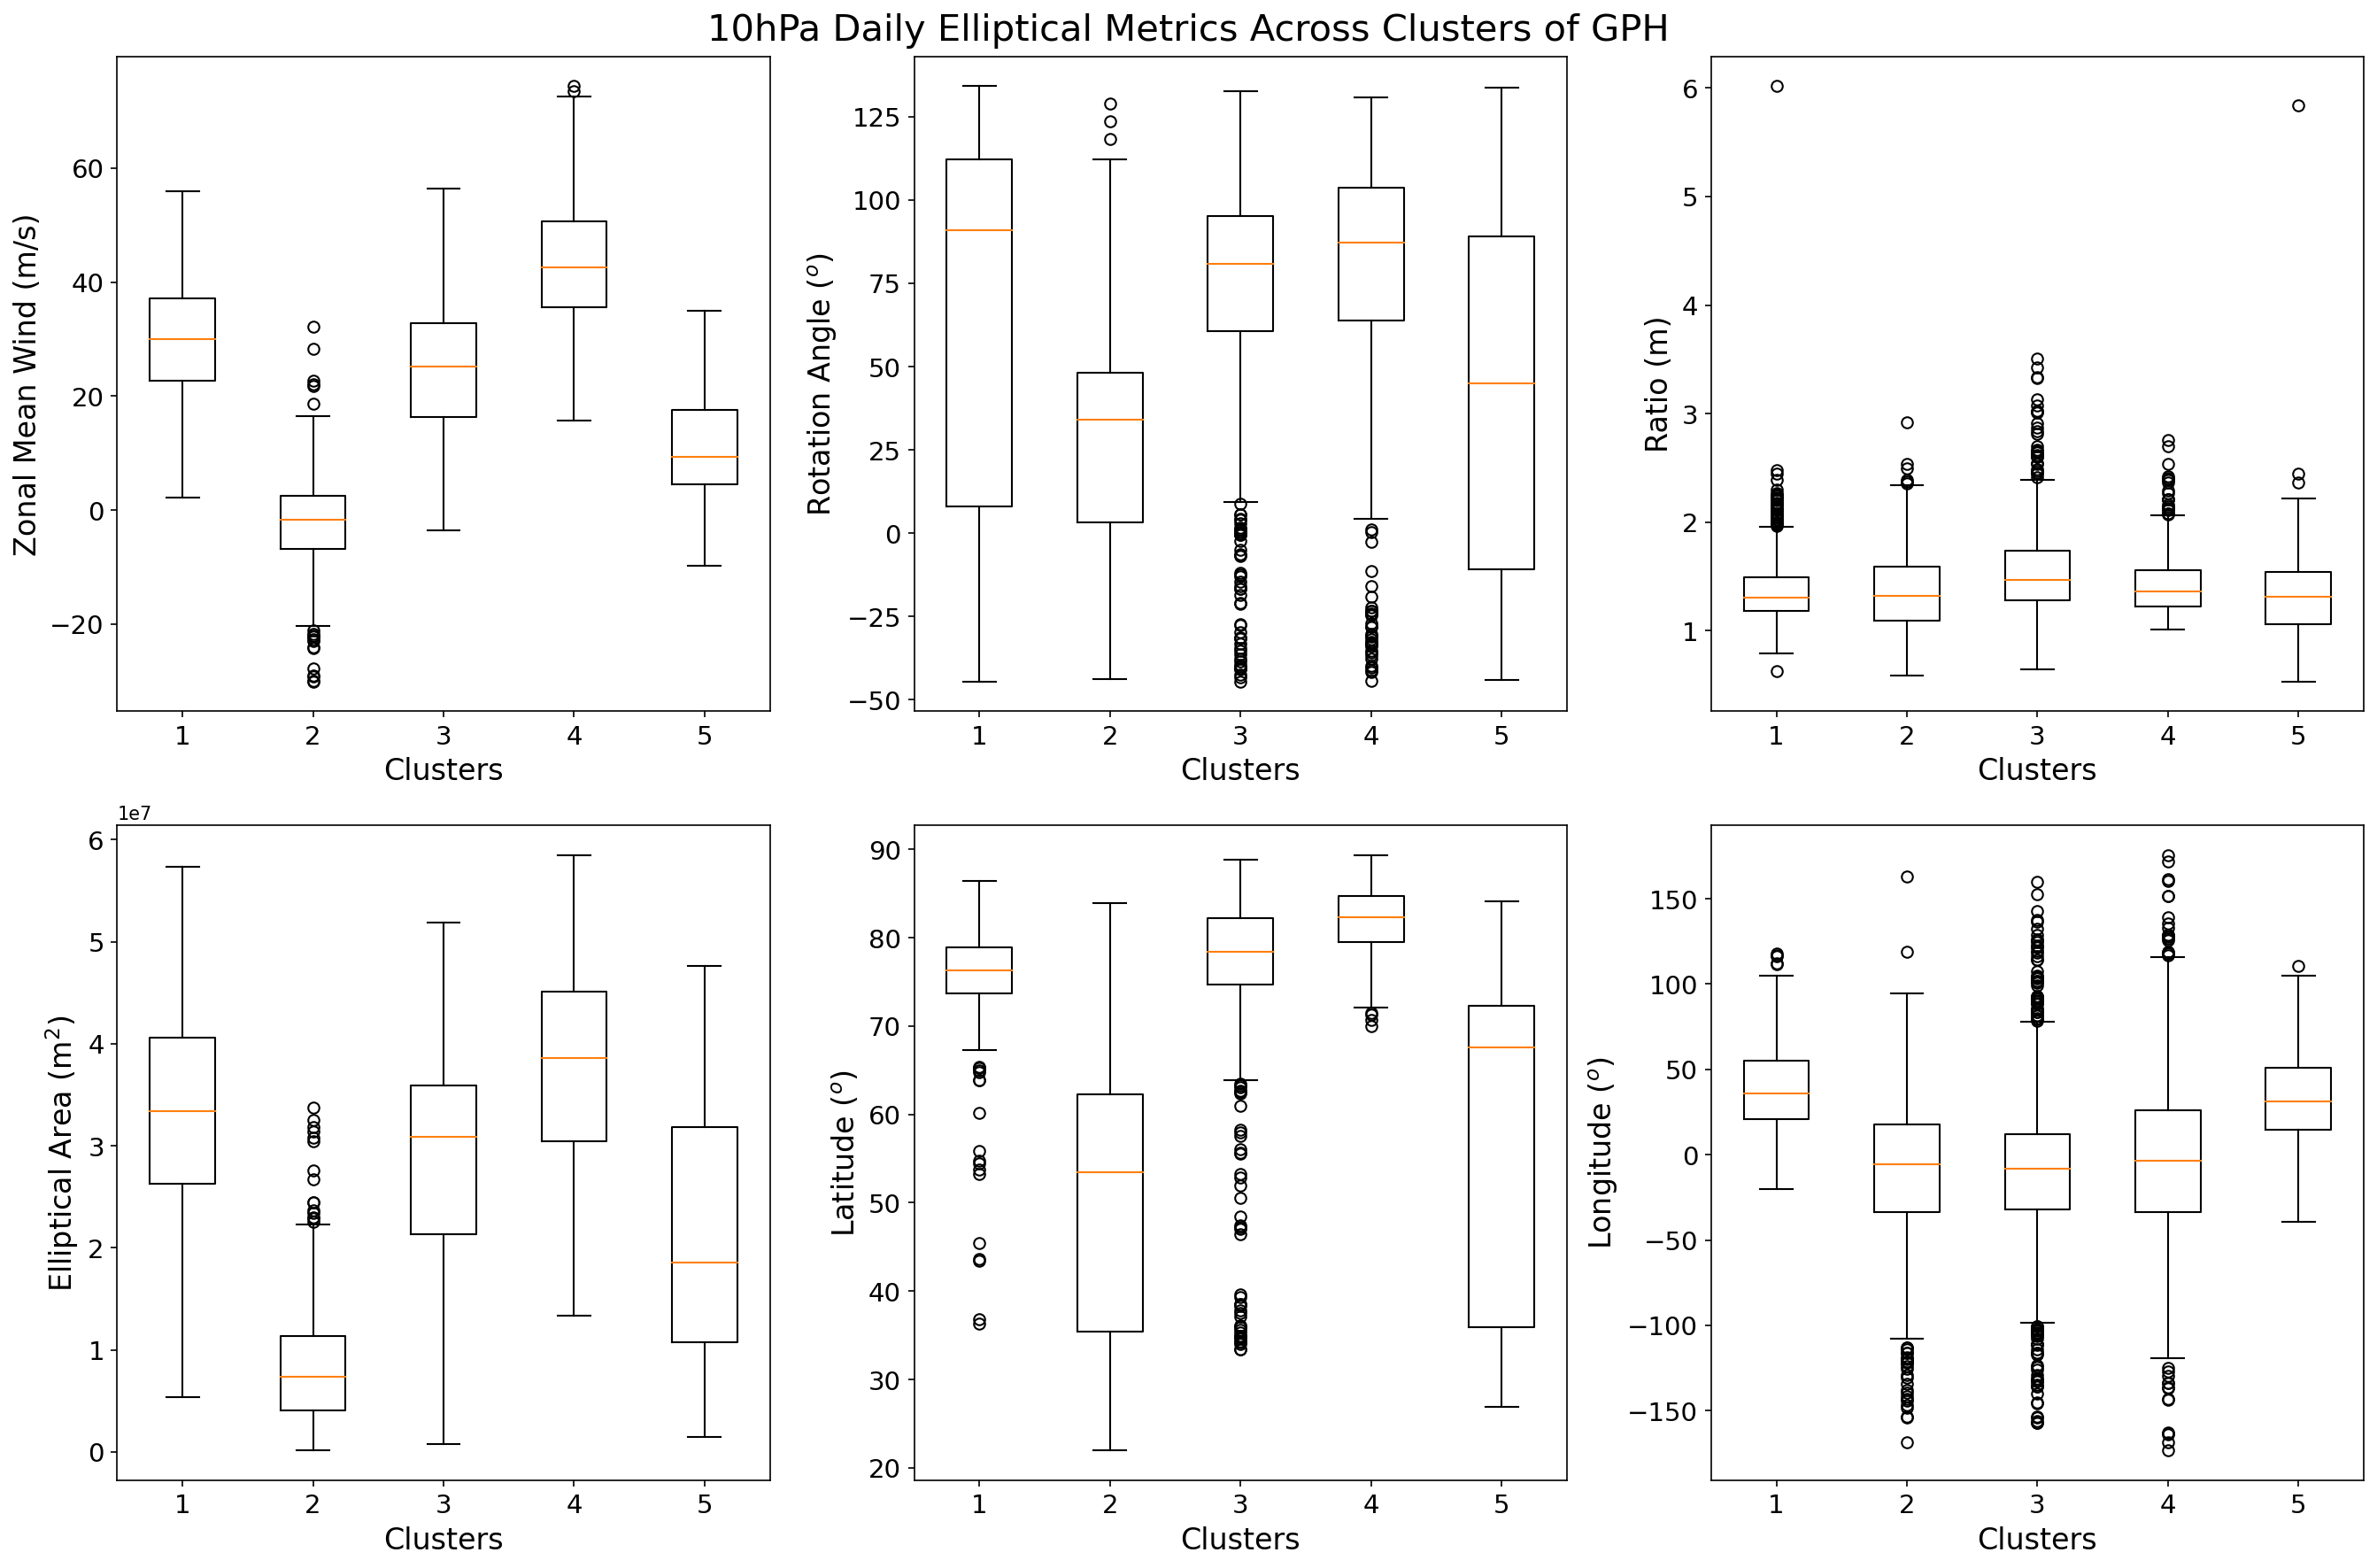

In [26]:
%matplotlib inline
fig = plt.figure(figsize=(18,12),dpi=150)
fig.suptitle("10hPa Daily Elliptical Metrics Across Clusters of GPH",fontsize = 20)
#loop through each member
ax1 = plt.subplot(2,3,1)
ax1.boxplot(wind_clus)
ax1.set_xlabel("Clusters",fontsize = 16)
ax1.set_ylabel("Zonal Mean Wind (m/s)",fontsize = 16)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2 = plt.subplot(2,3,2)
ax2.boxplot(ephi_clus)
ax2.set_xlabel("Clusters",fontsize = 16)
ax2.set_ylabel("Rotation Angle ($^o$)",fontsize = 16)
ax2.tick_params(axis='both', which='major', labelsize=14)

ax3 = plt.subplot(2,3,3)
ax3.boxplot(rat_clus)
ax3.set_xlabel("Clusters",fontsize = 16)
ax3.set_ylabel("Ratio (m)",fontsize = 16)
ax3.tick_params(axis='both', which='major', labelsize=14)

ax4 = plt.subplot(2,3,4)
ax4.boxplot(size_clus)
ax4.set_xlabel("Clusters",fontsize = 16)
ax4.set_ylabel("Elliptical Area (m$^2$)",fontsize = 16)
ax4.tick_params(axis='both', which='major', labelsize=14)

ax5 = plt.subplot(2,3,5)
ax5.boxplot(cenlat_clus)
ax5.set_xlabel("Clusters",fontsize = 16)
ax5.set_ylabel("Latitude ($^o$)",fontsize = 16)
ax5.tick_params(axis='both', which='major', labelsize=14)

ax6 = plt.subplot(2,3,6)
ax6.boxplot(cenlon_clus)
ax6.set_xlabel("Clusters",fontsize = 16)
ax6.set_ylabel("Longitude ($^o$)",fontsize = 16)
ax6.tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()
fig.savefig("AnomalyClus_Met_BoxPlot.png")


The cells above will be used for visualizing the average value over the course of each cluster. 